In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:
df_train = pd.read_csv("C:/Users/keena/OneDrive/Desktop/Study material college/CSV FOR DATA CLEANING/CSVS/Big market sales data/Train.csv")

In [50]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


c:\Users\keena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


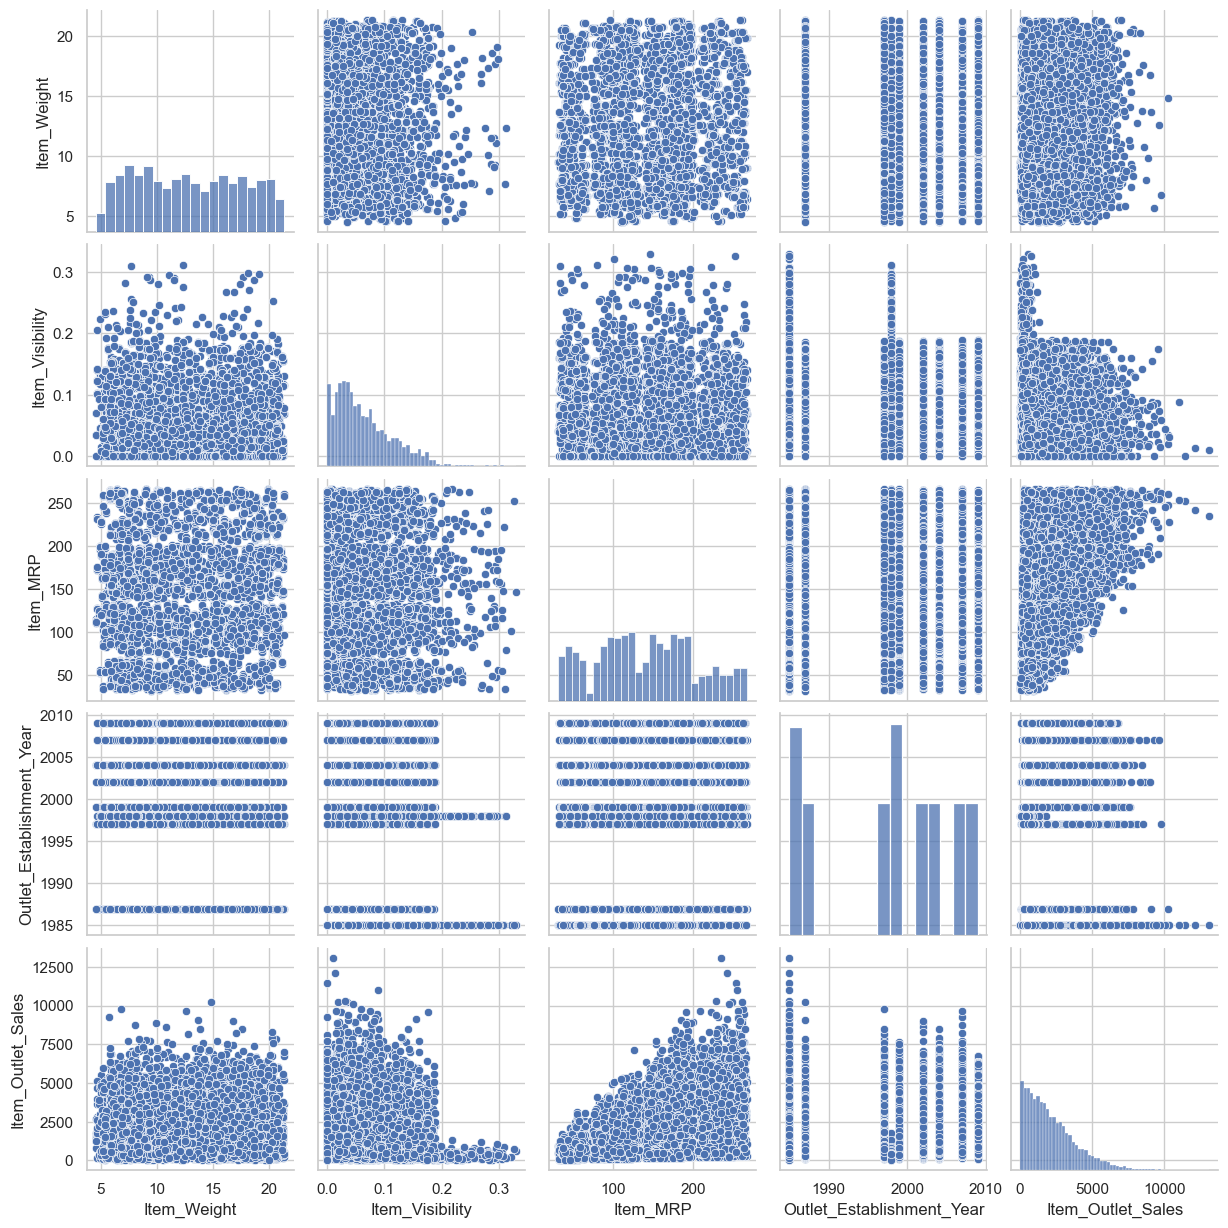

In [51]:
sns.pairplot(df_train)

In [52]:
df_train['Item_Identifier'].duplicated().sum()

6964

In [53]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [55]:
df_train.shape

(8523, 12)

OUTLIER TREATMENT

<Figure size 640x480 with 0 Axes>

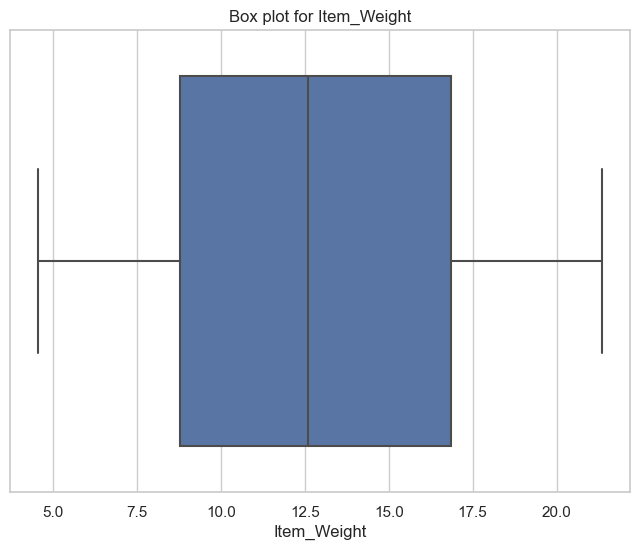

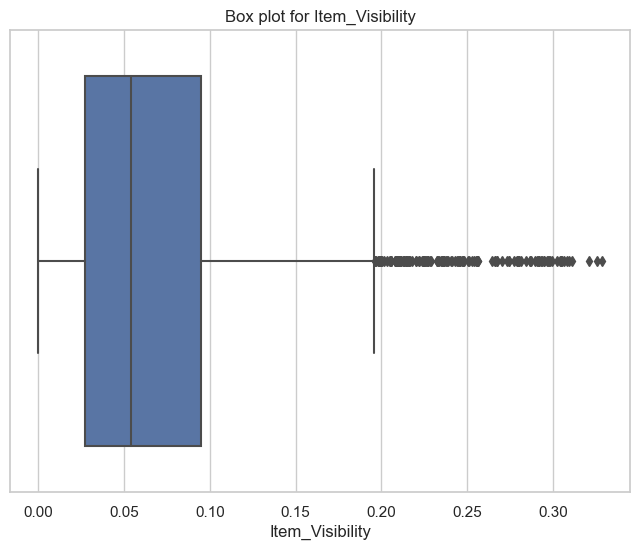

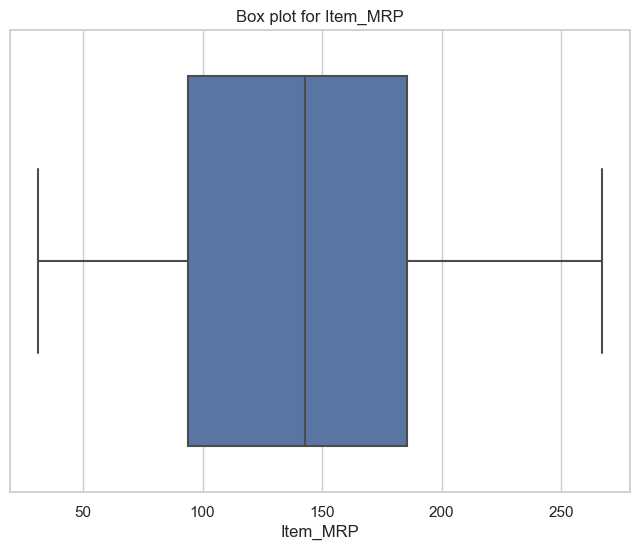

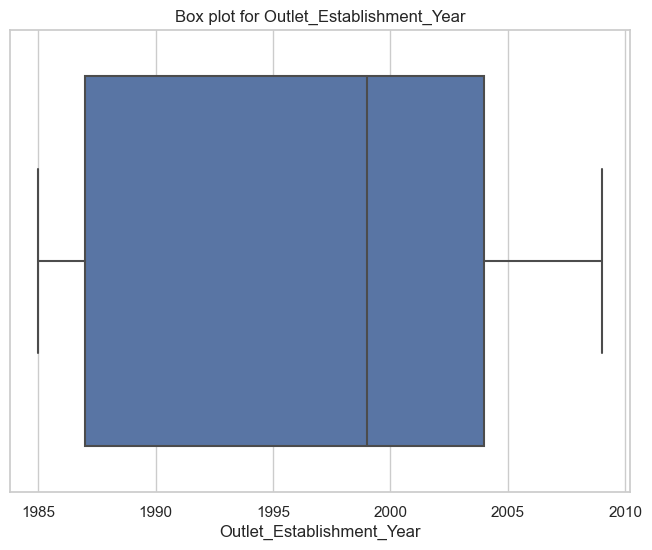

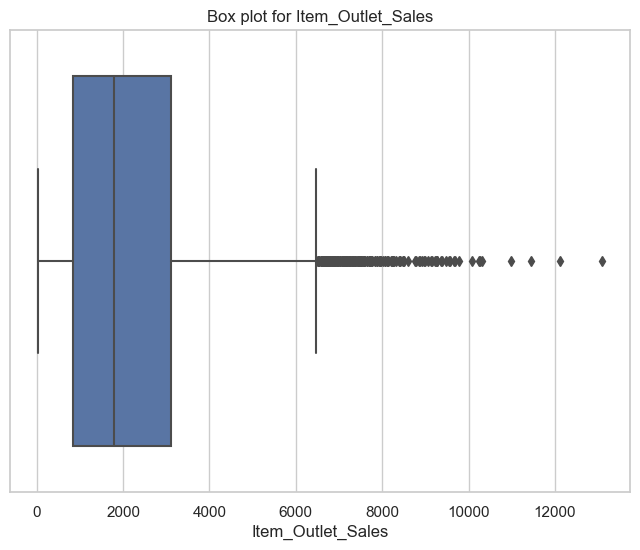

In [56]:
plt.tight_layout()
# List of columns for which you want to create box plots
columns_to_plot = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Set the style of the plots
sns.set(style="whitegrid")

# Create box plots using Seaborn
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel(column)
    plt.show()

In [57]:
df_train = df_train[df_train['Item_Visibility'] < 0.20]

In [58]:
df_train = df_train[df_train['Item_Outlet_Sales'] < 6300]

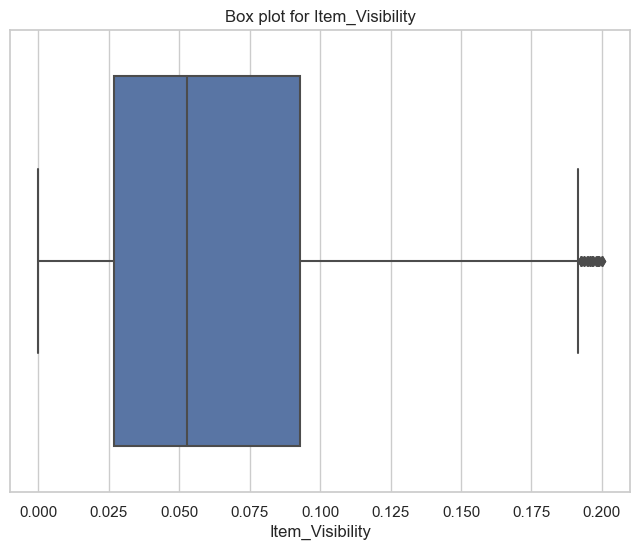

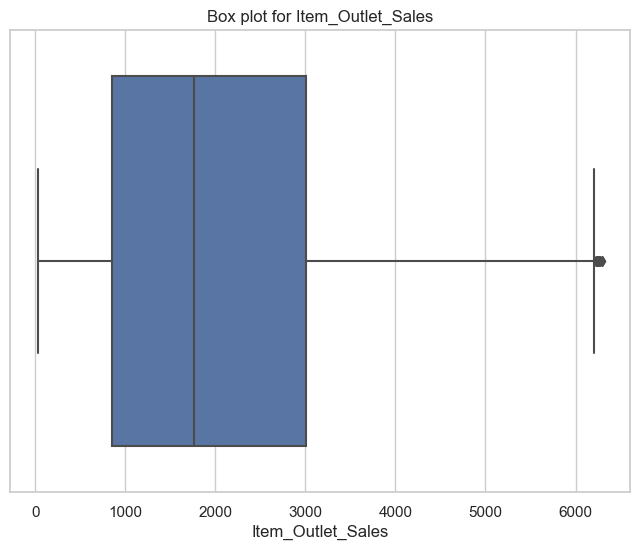

In [59]:
columns_to_plot = ['Item_Visibility', 'Item_Outlet_Sales']

# Set the style of the plots
sns.set(style="whitegrid")

# Create box plots using Seaborn
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel(column)
    plt.show()

TREATING NULL VALUES

In [60]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1278
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2313
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
df_train['Outlet_Size'].shape

(8166,)

In [62]:
df_train['Item_Weight'].shape

(8166,)

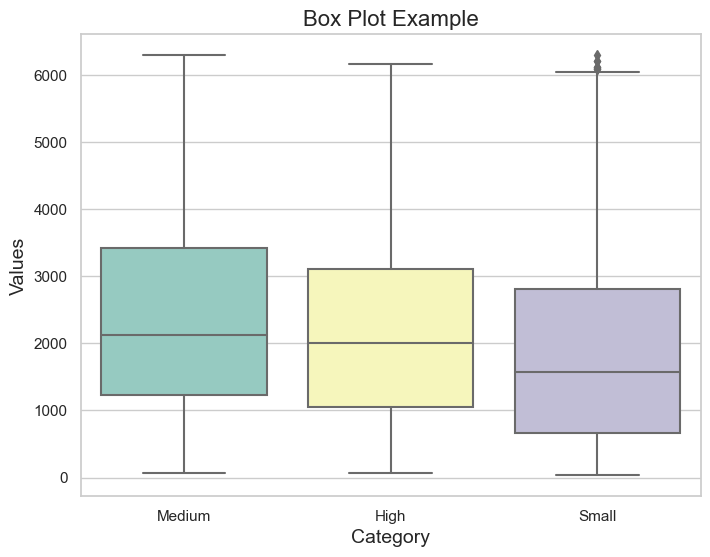

In [63]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot
# Create the box plot
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train, palette="Set3")

# Set the labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Box Plot Example', fontsize=16)

# Show the plot
plt.show()


In [64]:
df_train['Outlet_Size'].describe()

count       5853
unique         3
top       Medium
freq        2656
Name: Outlet_Size, dtype: object

In [65]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna('Medium')

In [66]:
df_train['Item_Weight'].describe()

count    6888.000000
mean       12.863257
std         4.647371
min         4.555000
25%         8.775000
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [67]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].median())

In [68]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

ENCODING

Item_Fat_Content

In [69]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [70]:
df_train['Outlet_Size'].nunique()

3

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

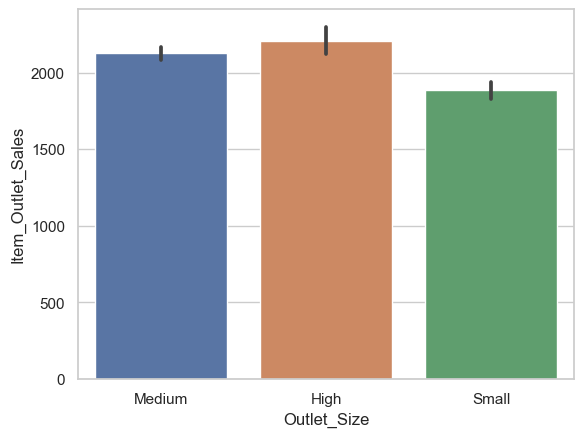

In [71]:
sns.barplot(x='Outlet_Size' , y='Item_Outlet_Sales' , data = df_train)

In [72]:
# Using label encoding for ordinal data
size_mapping = {'Small': 0, 'Medium': 1, 'High': 2}
df_train['Outlet_Size'] = [size_mapping[size] for size in df_train['Outlet_Size']]

In [73]:
df_train['Outlet_Location_Type'].nunique()

3

In [74]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

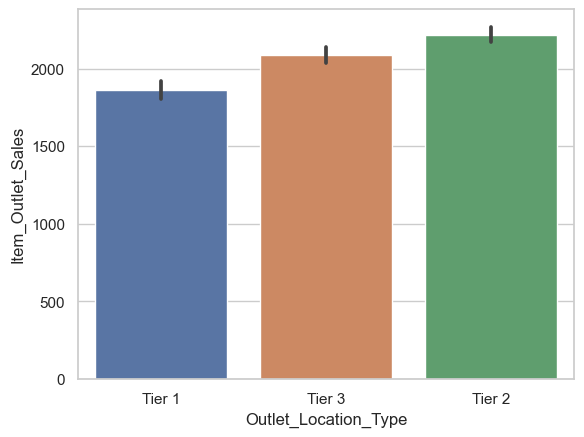

In [75]:
sns.barplot(x='Outlet_Location_Type' , y='Item_Outlet_Sales' , data = df_train)

In [76]:
# Using label encoding for ordinal data
size_mapping = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
df_train['Outlet_Location_Type'] = [size_mapping[size] for size in df_train['Outlet_Location_Type']]

In [77]:
df_train['Outlet_Type'].nunique()

4

In [78]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

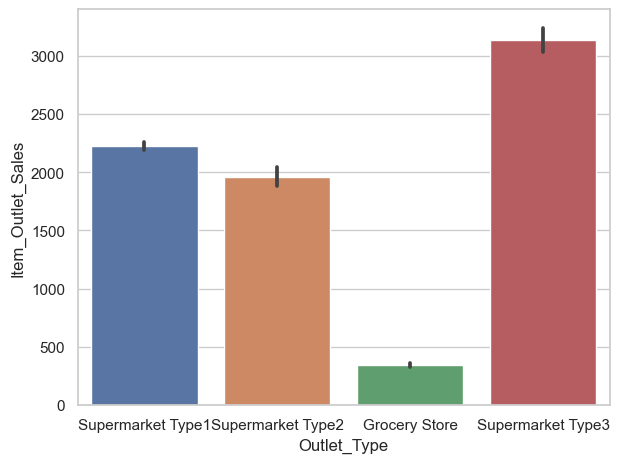

In [79]:
sns.barplot(x='Outlet_Type' , y='Item_Outlet_Sales' , data = df_train)
plt.tight_layout()

In [80]:
# Using label encoding for ordinal data
size_mapping = {'Grocery Store': 0, 'Supermarket Type2': 1, 'Supermarket Type3': 2 ,'Supermarket Type1' : 3}
df_train['Outlet_Type'] = [size_mapping[size] for size in df_train['Outlet_Type']]

In [81]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [82]:
def map_categories(x):
    if x.lower() in ['low fat', 'lf']:
        return 1
    elif x.lower() in ['regular', 'reg']:
        return 0
    else:
        return None

# Apply the mapping function to the 'Category' column using apply()
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].apply(map_categories)

In [83]:
df_train['Item_Fat_Content'].unique()

array([1, 0], dtype=int64)

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [85]:
df_train['Item_Identifier'] = label_encoder.fit_transform(df_train['Item_Identifier'])
df_train['Outlet_Identifier'] = label_encoder.fit_transform(df_train['Outlet_Identifier'])
df_train['Item_Type'] = label_encoder.fit_transform(df_train['Item_Type'])

CONVERTING TO PROPER DATA TYPES

In [86]:
df_train['Outlet_Establishment_Year'] = df_train['Outlet_Establishment_Year'].astype('category')

In [87]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,3,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,1,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,3,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,2,3,994.7052


SPLITTING INTO TRAIN AND TEST

In [88]:
x = df_train.drop(["Item_Outlet_Sales"], axis=1)
y = df_train["Item_Outlet_Sales"]

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

TRAINING THE MODEL

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lm = LinearRegression()

In [94]:
lm.fit(x_train,y_train)

LinearRegression()

In [95]:
lm.coef_

array([  8.55397162,  -4.06171766, -30.12107021, -34.29065648,
         3.51511288, 838.56830428, 432.17759306, -84.30487561,
       -92.14660098, 595.73251806, 488.22533156])

MAKING NEW COLUMN CALLED COEFF

In [96]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

In [97]:
cdf

,Coeff
Item_Identifier,8.553972
Item_Weight,-4.061718
Item_Fat_Content,-30.121070
Item_Visibility,-34.290656
Item_Type,3.515113
Item_MRP,838.568304
Outlet_Identifier,432.177593
Outlet_Establishment_Year,-84.304876
Outlet_Size,-92.146601
Outlet_Location_Type,595.732518


In [98]:
predictions = lm.predict(x_test)

EVALUATION MATRIX

In [99]:
from sklearn import metrics

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 806.9386358299572
MSE: 1092587.822432823
RMSE: 1045.2692583410378


In [101]:
lm.score(x_test,y_test)

0.5001593929393204